## Question:
## Q1. Build a MLP architecture with two or more hidden layers
* Use any open data set from kaggle or public forum
* Perform train, validation and test split of data set
* Compute the cost for all epochs and plot (either MSE or accuracy) (refer fig)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.shape

(200, 4)

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


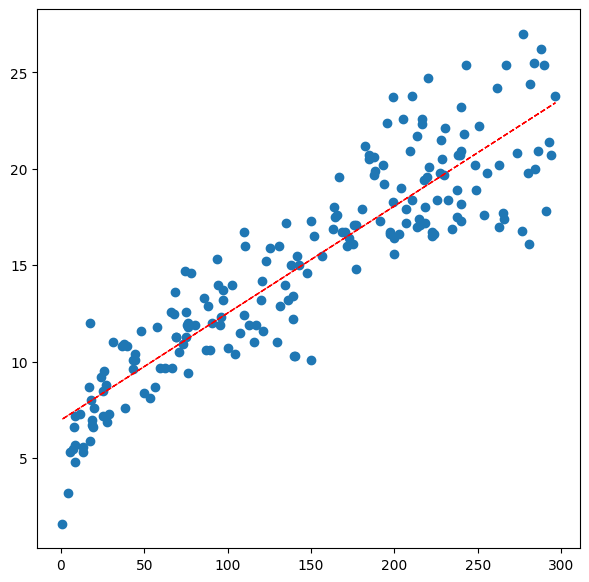

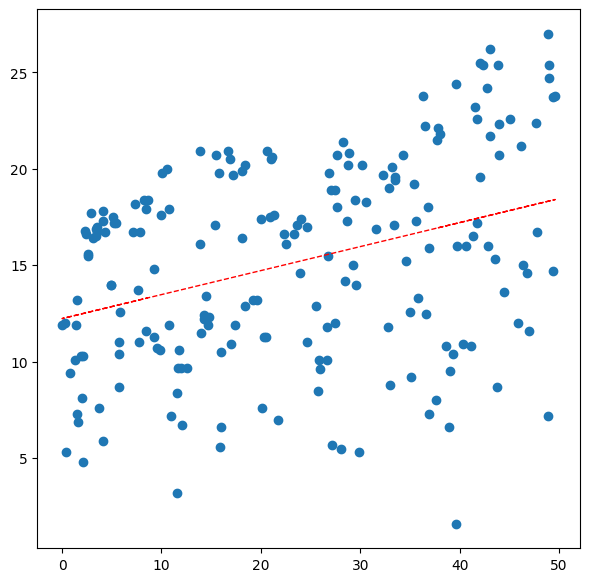

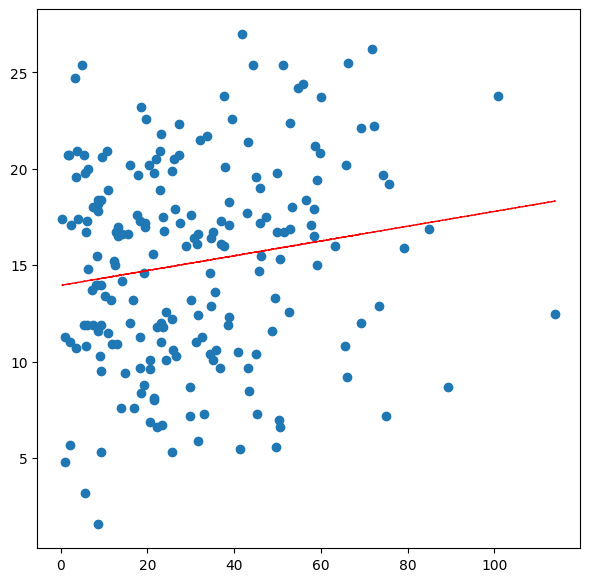

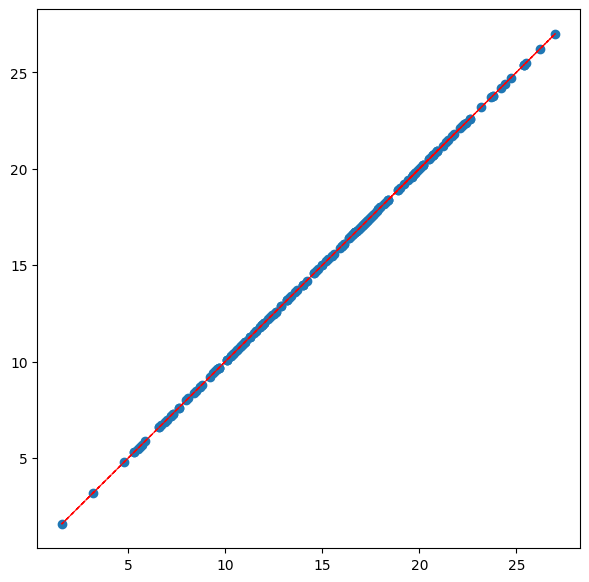

In [11]:
for i in data:
    fig = plt.figure(figsize=(7,7))

    #get the current axis
    fig = fig.gca()
    feature = data[i] 
    label = data['Sales']
    plt.scatter(x = feature, y = label)
    z = np.polyfit(data[i], data['Sales'],1)
    y_hat = np.poly1d(z)(data[i])

    plt.plot(data[i],y_hat, "r--", lw=1)
plt.show()

In [12]:
X = data.iloc[:,:-1]
X
y = data['Sales']

## Multi layer Perceptron

In [14]:
# Sigmoid Activation function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)
    

In [13]:
# Feed Forward network

def forward_pass(inputs, hidden_weights, hidden_bias, output_weights, output_bias):

    hidden_layer_activation = np.dot(inputs, hidden_weights)
    hidden_layer_activation += hidden_bias

    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output, output_weights)
    output_layer_activation += output_bias

    predicted_output = sigmoid(output_layer_activation)

    return predicted_output, hidden_layer_output

In [15]:
# Backward propagation step

def backward_pass(expected_output, predicted_output, output_weights, hidden_layer_output):

    error = expected_output - predicted_output

    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    return d_predicted_output, d_hidden_layer

In [16]:
# initializing learning rate
lr = 0.1
# total epochs
epochs = 20
# 1 output layer neuron for single output
# 2 input layer neuron to pass 
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2, 2, 1

In [17]:
# Training Neural Network

def train(epochs, lr, inputs, inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons):

  # Initializing random weights and biases for training

    hidden_weights = np.random.uniform(size=(inputLayerNeurons, hiddenLayerNeurons))

    hidden_bias =np.random.uniform(size=(1, hiddenLayerNeurons))

    output_weights = np.random.uniform(size=(hiddenLayerNeurons, outputLayerNeurons))

    output_bias = np.random.uniform(size=(1, outputLayerNeurons))

    for epoch in range(epochs):

    # forward pass
        predicted_output, hidden_layer_output = forward_pass(inputs, hidden_weights, hidden_bias, output_weights, output_bias)

        # backward pass
        d_predicted_output, d_hidden_layer = backward_pass(outputs, predicted_output, output_weights, hidden_layer_output)

        #Updating Weights and Biases
        output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr

        output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * lr

        hidden_weights += inputs.T.dot(d_hidden_layer) * lr

        hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr

    if epoch % 1000 == 0:
        print(f"Training.... epoch: {epoch}")
    if epoch == (epochs - 1):
        print('\nTraining completed!')
      
    return predicted_output

In [19]:
 
predicted_output = train(epochs, lr, X, inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons)



ValueError: shapes (200,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)